# Lecture 1106: Reading in Excel files

In [1]:
import pandas as pd

## pd.read_excel()

## Download data

On November 6, 2023, I downloaded two files from Cal-Access:
- `prop31_yes.xls` from [YES ON PROPOSITION 31](https://cal-access.sos.ca.gov/Campaign/Committees/Detail.aspx?id=1436431&session=2021&view=received) using the download link that says "DOWNLOAD THESE RESULTS: MICROSOFT EXCEL"
- `prop31_no.xls` from [NO ON PROPOSITION 31](https://cal-access.sos.ca.gov/Campaign/Committees/Detail.aspx?id=1431407&session=2021&view=received) using the download link that says "DOWNLOAD THESE RESULTS: MICROSOFT EXCEL"

We're going to use the method [`pd.read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) to import the data.

In [2]:
# you will get an error when running this
prop31_no = pd.read_excel('prop31_no.xls')

ValueError: Excel file format cannot be determined, you must specify an engine manually.

## Error 1
The error we got was "Excel file format cannot be determined, you must specify an engine manually." Let's go to the [method's documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) and search for `engine`.

```
engine: str, default None
If io is not a buffer or path, this must be set to identify io. Supported engines: “xlrd”, “openpyxl”, “odf”, “pyxlsb”. Engine compatibility :
- “xlrd” supports old-style Excel files (.xls).
- “openpyxl” supports newer Excel file formats.
- “odf” supports OpenDocument file formats (.odf, .ods, .odt).
- “pyxlsb” supports Binary Excel files.
```

This is a .xls file, so we should use the `xlrd` engine.

In [3]:
# you will STILL get an error when running this
prop31_no = pd.read_excel('prop31_no.xls', engine='xlrd')

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'NAME OF '

## Error 2

The error I got here was "Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd."

So, let's `pip install xlrd`. 

In [4]:
# pip install xlrd

In [5]:
# you will STILL get an error when running this
prop31_no = pd.read_excel('prop31_no.xls', engine='xlrd')

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'NAME OF '

## Error 3
I still got an error! The error I got was: "Unsupported format, or corrupt file: Expected BOF record; found b'"NAME OF'"

OK, so does anyone know what the problem is?

If you have Excel on your computer, try opening up the file.

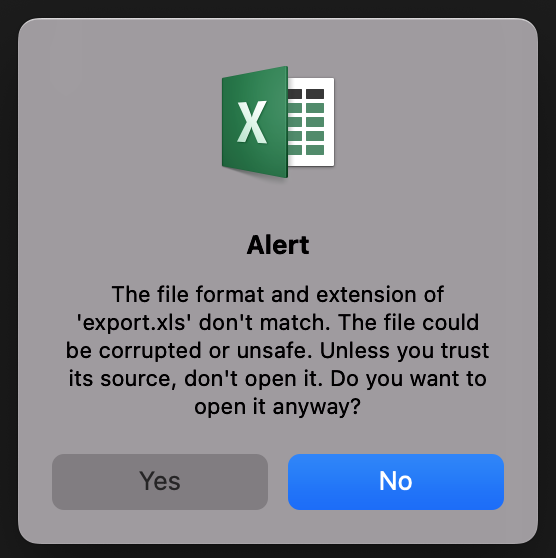

(The above screenshot is just an example — the file name will be different.)

Something is wrong with this file. So when I got that alert, I hit "Yes" then saved the file in Excel as a `.xlsx` file.

## Try importing again

In [6]:
# we'll change the engine since `xlrd` doesn't support .xlsx files
prop31_no = pd.read_excel('prop31_no.xlsx', engine='openpyxl')

ARGH: "ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl."

### Install openpyxl

In [7]:
# pip install openpyxl

## FINALLY, import data

In [8]:
prop31_no = pd.read_excel('prop31_no.xlsx', engine='openpyxl')

Yay, that worked! Let's see what's inside and be sure to export a CSV of this!!!

## Explore and export

In [9]:
prop31_no

NAME OF CONTRIBUTOR  PAYMENT TYPE  \
0            PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY   
1            PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY   
2            PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY   
3            PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY   
4     R.J. REYNOLDS TOBACCO COMPANY AND ITS AFFILIATES  NON-MONETARY   
..                                                 ...           ...   
290  R.J. REYNOLDS VAPOR COMPANY, AN AFFILIATE OF '...          LOAN   
291  SANTA FE NATURAL TOBACCO COMPANY, AN AFFILIATE...          LOAN   
292  JOHN MIDDLETON CO., AN AFFILIATE OF 'PHILIP MO...          LOAN   
293  PHILIP MORRIS USA INC., AN AFFILIATE OF 'PHILI...          LOAN   
294  U.S. SMOKELESS TOBACCO COMPANY, AN AFFILIATE O...          LOAN   

              CITY STATE    ZIP  ID NUMBER  EMPLOYER  OCCUPATION    AMOUNT  \
0       SACRAMENTO    CA  95814        NaN       NaN         NaN  24745.01   
1       SACRAMENTO    CA  95814        NaN       NaN         NaN   7500.00   
2       SACRAMENTO    CA  95814        NaN       NaN         NaN  22500.00   
3       SACRAMENTO    CA  95814        NaN       NaN         NaN  30000.00   
4    WINSTON-SALEM    NC  27101        NaN       NaN         NaN   3490.86   
..             ...   ...    ...        ...       ...         ...       ...   
290  WINSTON-SALEM    NC  27101        NaN       NaN         NaN      0.00   
291  WINSTON-SALEM    NC  27101        NaN       NaN         NaN      0.00   
292     SACRAMENTO    CA  95814        NaN       NaN         NaN      0.00   
293     SACRAMENTO    CA  95814        NaN       NaN         NaN      0.00   
294     SACRAMENTO    CA  95814        NaN       NaN         NaN      0.00   

    TRANSACTION DATE FILED DATE TRANSACTION NUMBER  
0         2022-07-01 2022-12-21   2726417 - NON266  
1         2022-07-01 2022-12-21   2726417 - NON267  
2         2022-07-01 2022-12-21   2726417 - NON268  
3         2022-07-01 2022-12-21   2726417 - NON269  
4         2022-07-01 2022-12-21   2726417 - NON270  
..               ...        ...                ...  
290       2020-10-09 2022-12-21    2744504 - PAY70  
291       2020-10-09 2022-12-21    2744504 - PAY72  
292       2020-10-13 2022-12-21    2744504 - PAY81  
293       2020-10-13 2022-12-21    2744504 - PAY83  
294       2020-10-13 2022-12-21    2744504 - PAY85  

[295 rows x 12 columns]

In [10]:
prop31_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NAME OF CONTRIBUTOR  295 non-null    object        
 1   PAYMENT TYPE         295 non-null    object        
 2   CITY                 295 non-null    object        
 3   STATE                295 non-null    object        
 4   ZIP                  295 non-null    int64         
 5   ID NUMBER            0 non-null      float64       
 6   EMPLOYER             0 non-null      float64       
 7   OCCUPATION           0 non-null      float64       
 8   AMOUNT               295 non-null    float64       
 9   TRANSACTION DATE     295 non-null    datetime64[ns]
 10  FILED DATE           295 non-null    datetime64[ns]
 11  TRANSACTION NUMBER   295 non-null    object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 27.8+ KB


Just exploring a bit...

In [11]:
prop31_no[prop31_no['NAME OF CONTRIBUTOR'] == 'PHILIP MORRIS USA INC. AND ITS AFFILIATES']

NAME OF CONTRIBUTOR  PAYMENT TYPE        CITY  \
0    PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
1    PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
2    PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
3    PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
6    PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
7    PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
8    PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
9    PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
10   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
11   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
12   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
13   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
14   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
18   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
19   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
20   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
21   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
24   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
61   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
62   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
63   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
87   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
88   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
89   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
90   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
91   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
94   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
95   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
96   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
97   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
98   PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
101  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
102  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
103  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
104  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
105  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
106  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
149  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
150  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
151  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
186  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
256  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
257  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
258  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   
259  PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY  SACRAMENTO   

    STATE    ZIP  ID NUMBER  EMPLOYER  OCCUPATION    AMOUNT TRANSACTION DATE  \
0      CA  95814        NaN       NaN         NaN  24745.01       2022-07-01   
1      CA  95814        NaN       NaN         NaN   7500.00       2022-07-01   
2      CA  95814        NaN       NaN         NaN  22500.00       2022-07-01   
3      CA  95814        NaN       NaN         NaN  30000.00       2022-07-01   
6      CA  95814        NaN       NaN         NaN   1801.51       2022-07-01   
7      CA  95814        NaN       NaN         NaN 

In [12]:
prop31_no['TRANSACTION DATE'].min()

Timestamp('2020-09-21 00:00:00')

In [13]:
prop31_no['TRANSACTION DATE'].max()

Timestamp('2022-11-01 00:00:00')

In [14]:
prop31_no['ID NUMBER'].unique()

array([nan])

Anything you're noticing about the data?

### Re-import the data, typed

In [ ]:
# df[column] = pd.to_datetime(df[column]) equivalent for string?
# df[column] = df[column].astype(str) 

In [15]:
prop31_no = pd.read_excel(
    'prop31_no.xlsx',
    dtype={
        'ZIP': object,
        'ID NUMBER' : object
    },
    engine='openpyxl',
)

In [16]:
prop31_no

NAME OF CONTRIBUTOR  PAYMENT TYPE  \
0            PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY   
1            PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY   
2            PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY   
3            PHILIP MORRIS USA INC. AND ITS AFFILIATES  NON-MONETARY   
4     R.J. REYNOLDS TOBACCO COMPANY AND ITS AFFILIATES  NON-MONETARY   
..                                                 ...           ...   
290  R.J. REYNOLDS VAPOR COMPANY, AN AFFILIATE OF '...          LOAN   
291  SANTA FE NATURAL TOBACCO COMPANY, AN AFFILIATE...          LOAN   
292  JOHN MIDDLETON CO., AN AFFILIATE OF 'PHILIP MO...          LOAN   
293  PHILIP MORRIS USA INC., AN AFFILIATE OF 'PHILI...          LOAN   
294  U.S. SMOKELESS TOBACCO COMPANY, AN AFFILIATE O...          LOAN   

              CITY STATE    ZIP ID NUMBER  EMPLOYER  OCCUPATION    AMOUNT  \
0       SACRAMENTO    CA  95814       NaN       NaN         NaN  24745.01   
1       SACRAMENTO    CA  95814       NaN       NaN         NaN   7500.00   
2       SACRAMENTO    CA  95814       NaN       NaN         NaN  22500.00   
3       SACRAMENTO    CA  95814       NaN       NaN         NaN  30000.00   
4    WINSTON-SALEM    NC  27101       NaN       NaN         NaN   3490.86   
..             ...   ...    ...       ...       ...         ...       ...   
290  WINSTON-SALEM    NC  27101       NaN       NaN         NaN      0.00   
291  WINSTON-SALEM    NC  27101       NaN       NaN         NaN      0.00   
292     SACRAMENTO    CA  95814       NaN       NaN         NaN      0.00   
293     SACRAMENTO    CA  95814       NaN       NaN         NaN      0.00   
294     SACRAMENTO    CA  95814       NaN       NaN         NaN      0.00   

    TRANSACTION DATE FILED DATE TRANSACTION NUMBER  
0         2022-07-01 2022-12-21   2726417 - NON266  
1         2022-07-01 2022-12-21   2726417 - NON267  
2         2022-07-01 2022-12-21   2726417 - NON268  
3         2022-07-01 2022-12-21   2726417 - NON269  
4         2022-07-01 2022-12-21   2726417 - NON270  
..               ...        ...                ...  
290       2020-10-09 2022-12-21    2744504 - PAY70  
291       2020-10-09 2022-12-21    2744504 - PAY72  
292       2020-10-13 2022-12-21    2744504 - PAY81  
293       2020-10-13 2022-12-21    2744504 - PAY83  
294       2020-10-13 2022-12-21    2744504 - PAY85  

[295 rows x 12 columns]

In [17]:
prop31_no[prop31_no['AMOUNT'] < 0]

Empty DataFrame
Columns: [NAME OF CONTRIBUTOR, PAYMENT TYPE, CITY, STATE, ZIP, ID NUMBER, EMPLOYER, OCCUPATION, AMOUNT, TRANSACTION DATE, FILED DATE, TRANSACTION NUMBER]
Index: []

### Export

In [18]:
prop31_no.to_csv('prop31_no.csv', index=False)

## Repeat for `prop31_yes.xlsx`

In [19]:
prop31_yes = pd.read_excel(
    'prop31_yes.xlsx', 
    dtype={
        'ZIP': object,
        'ID NUMBER' : object
    },
    engine='openpyxl'
)

In [20]:
prop31_yes

NAME OF CONTRIBUTOR  PAYMENT TYPE  \
0                                  MICHAEL R BLOOMBERG      MONETARY   
1    KAISER FOUNDATION HEALTH PLAN, INC. AND THE HO...      MONETARY   
2    KAISER FOUNDATION HEALTH PLAN, INC. AND THE HO...      MONETARY   
3                                  MICHAEL R BLOOMBERG  NON-MONETARY   
4    TOBACCO-FREE KIDS ACTION FUND (NONPROFIT 501(C...  NON-MONETARY   
..                                                 ...           ...   
159                                       DALE HILLARD      MONETARY   
160                                MICHAEL R BLOOMBERG  NON-MONETARY   
161                                MICHAEL R BLOOMBERG  NON-MONETARY   
162                                MICHAEL R BLOOMBERG  NON-MONETARY   
163                                MICHAEL R BLOOMBERG  NON-MONETARY   

           CITY STATE    ZIP ID NUMBER      EMPLOYER  OCCUPATION     AMOUNT  \
0      NEW YORK    NY  10022       NaN  BLOOMBERG LP     FOUNDER  667000.00   
1    SACRAMENTO    CA  95814       NaN           NaN         NaN   50000.00   
2    SACRAMENTO    CA  95814       NaN           NaN         NaN   50000.00   
3      NEW YORK    NY  10022       NaN  BLOOMBERG LP     FOUNDER    5048.00   
4    WASHINGTON    DC  20005   1399920           NaN         NaN    5545.00   
..          ...   ...    ...       ...           ...         ...        ...   
159     SALINAS    CA  93908       NaN          NONE  UNEMPLOYED     120.00   
160    NEW YORK    NY  10022       NaN  BLOOMBERG LP     FOUNDER   58500.00   
161    NEW YORK    NY  10022       NaN  BLOOMBERG LP     FOUNDER    4391.51   
162    NEW YORK    NY  10022       NaN  BLOOMBERG LP     FOUNDER     856.88   
163    NEW YORK    NY  10022       NaN  BLOOMBERG LP     FOUNDER    1736.16   

    TRANSACTION DATE FILED DATE TRANSACTION NUMBER  
0         2021-03-08 2021-04-30     2580652 - INC1  
1         2021-03-26 2021-04-30     2580652 - INC4  
2         2021-03-30 2021-04-30     2580652 - INC6  
3         2021-03-31 2021-04-30    2580652 - NON12  
4         2021-02-26 2021-04-30    2580652 - NON21  
..               ...        ...                ...  
159       2022-01-31 2022-05-02    2677420 - IDT74  
160       2022-01-27 2022-05-02   2677420 - NON233  
161       2022-02-15 2022-05-02   2677420 - NON236  
162       2022-01-15 2022-05-02   2677420 - NON237  
163       2022-01-31 2022-05-02   2677420 - NON238  

[164 rows x 12 columns]

In [21]:
prop31_yes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NAME OF CONTRIBUTOR  164 non-null    object        
 1   PAYMENT TYPE         164 non-null    object        
 2   CITY                 164 non-null    object        
 3   STATE                164 non-null    object        
 4   ZIP                  164 non-null    object        
 5   ID NUMBER            76 non-null     object        
 6   EMPLOYER             72 non-null     object        
 7   OCCUPATION           72 non-null     object        
 8   AMOUNT               164 non-null    float64       
 9   TRANSACTION DATE     164 non-null    datetime64[ns]
 10  FILED DATE           164 non-null    datetime64[ns]
 11  TRANSACTION NUMBER   164 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 15.5+ KB


In [22]:
prop31_yes[prop31_yes['AMOUNT'] < 0]

Empty DataFrame
Columns: [NAME OF CONTRIBUTOR, PAYMENT TYPE, CITY, STATE, ZIP, ID NUMBER, EMPLOYER, OCCUPATION, AMOUNT, TRANSACTION DATE, FILED DATE, TRANSACTION NUMBER]
Index: []

In [23]:
prop31_yes.to_csv('prop31_yes.csv', index=False)